In [48]:
import pandas as pd

# Data Loading

In [49]:
from api.data_handler import DataHandler

# Creation of a DataHandler Object
data_handler = DataHandler(['id', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'target_x', 'target_y', 'target_z'])

# Load the Training/Test sets into pandas DataFrames
df_train : pd.DataFrame = data_handler.load_data(f'data/cup/ML-CUP23-TR.csv', delimiter=',')
df_test  : pd.DataFrame = data_handler.load_data(f'data/cup/ML-CUP23-TS.csv', delimiter=',')

# Print the head of the loaded data
print(df_train.head())
print(df_test.head())

   id      col1      col2      col3      col4      col5      col6      col7  \
0   1 -0.917280 -0.712727 -0.989904  0.992819  0.993649  0.995543  0.711074   
1   2 -0.858784  0.998755 -0.998396  0.999909  0.316503 -0.951897 -0.163139   
2   3 -0.990441  0.958726 -0.998675  0.997216  0.987166  0.356483 -0.279689   
3   4  0.937117  0.984474 -0.612420  0.999812  0.728623 -0.539962 -0.165939   
4   5 -0.906628 -0.884567 -0.932487  0.941037  0.978134  0.998179  0.749606   

       col8      col9     col10   target_x   target_y   target_z  
0  0.407645 -0.688548  0.616890   7.897453 -35.936382  21.077147  
1  0.980982  0.661759 -0.800155  -9.330632  19.901571   6.069154  
2  0.599163 -0.684630  0.922901  14.849400   3.374090  19.667479  
3  0.999352 -0.921444 -0.974766 -46.591854  13.734777  17.953600  
4 -0.590599 -0.508268  0.691798   8.217500 -45.885254  14.894251  
   id      col1      col2      col3      col4      col5      col6      col7  \
0   1 -0.983589  0.989514 -0.998539  0.99944

In [50]:
# Searching for NaN values
for i, row in df_train.iterrows():
    bool_list = row.isna()
    if True in bool_list:
        print("NaN found in row: {row}")

# Data Split

In [51]:
# Saving the ID columns
df_id_train: pd.DataFrame = df_train['id']
df_id_test: pd.DataFrame = df_test['id']

# Drop the ID columns
df_train = df_train.drop(columns=['id'],axis=1).copy(deep=True)
df_test = df_test.drop(columns=['id'],axis=1).copy(deep=True)

# Split of columns and rows (0.8/0.2) into: TR set and Internal TS set
x_train, y_train, x_internal_test, y_internal_test = data_handler.split_data(
    data=df_train,
    cols_name_split=['target_x','target_y','target_z'],
    rows_split_perc=0.8
)

# Split on columns
x_test, y_test = data_handler.split_data(data=df_test, cols_name_split=['target_x','target_y','target_z'])

# Print of the shapes
print(f"[IDs TR SET]: " + str(df_id_train.shape))
print(f"[IDs TS SET]: " + str(df_id_test.shape))
print(f"[TR SET - x]: " + str(x_train.shape))
print(f"[TR SET - y]: " + str(y_train.shape))
print(f"[Internal TS SET - x]: " + str(x_internal_test.shape))
print(f"[Internal TS SET - y]: " + str(y_internal_test.shape))
print(f"[TS SET - x]: " + str(x_test.shape))
print(f"[TS SET - y]: " + str(y_test.shape))

[IDs TR SET]: (1000,)
[IDs TS SET]: (900,)
[TR SET - x]: (800, 10)
[TR SET - y]: (800, 3)
[Internal TS SET - x]: (200, 10)
[Internal TS SET - y]: (200, 3)
[TS SET - x]: (900, 10)
[TS SET - y]: (900, 3)


/Users/gianlucapanzani/anaconda3/envs/ML/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Grid Search parameters

In [52]:
# Parameters' space for Grid Search
param_space = {
    'input_size': [10],
    'hidden_size': [80, 100],
    'output_size': [3],
    'hidden_layers': [3, 4],
    'input_activation': [''],
    'hidden_activation': ['Tanh'],
    'output_activation': [''],
    'tolerance': [0.02],
    'learning_rate': [0.01, 0.005, 0.001], #[0.001, 0.0005, 0.0001],
    'batch_size': [56, 64, 72],
    'momentum': [0.8],
    'weight_init': ["glorot_normal", "he_normal"], #["glorot_uniform", "glorot_normal", "he_uniform", "he_normal"],
    'epochs': [700],
    'weight_decay': [0.0001],
    'optimizer': ['SGD'],
    'nesterov': [True],
    'metrics': ['MEE'],
    'decimal_cypher_degree': [1]
}
'''param_space = {
    'input_size': [10],
    'hidden_size': [60, 80, 100],
    'output_size': [3],
    'hidden_layers': [2, 3],
    'input_activation': ['ReLU'],
    'hidden_activation': ['ReLU', 'Tanh'],
    'output_activation': ['Linear'],
    'tolerance': [0.02],
    'learning_rate': [float(i/1000) for i in range(7,9)] + [0.01],
    'batch_size': [32, 64, 128],
    'momentum': [0.9, 0.8, 0.7],
    'weight_init': ["glorot_normal", "he_normal"], #["glorot_uniform", "glorot_normal", "he_uniform", "he_normal"],
    'epochs': [600, 700, 800],
    'weight_decay': [float(i/10000) for i in range(1,5)] + [0.001],
    'optimizer': ['SGD'],
    'nesterov': [True, False],
    'metrics': ['MEE'],
    'decimal_cypher_degree': [1]
}'''

'param_space = {\n    \'input_size\': [10],\n    \'hidden_size\': [60, 80, 100],\n    \'output_size\': [3],\n    \'hidden_layers\': [2, 3],\n    \'input_activation\': [\'ReLU\'],\n    \'hidden_activation\': [\'ReLU\', \'Tanh\'],\n    \'output_activation\': [\'Linear\'],\n    \'tolerance\': [0.02],\n    \'learning_rate\': [float(i/1000) for i in range(7,9)] + [0.01],\n    \'batch_size\': [32, 64, 128],\n    \'momentum\': [0.9, 0.8, 0.7],\n    \'weight_init\': ["glorot_normal", "he_normal"], #["glorot_uniform", "glorot_normal", "he_uniform", "he_normal"],\n    \'epochs\': [600, 700, 800],\n    \'weight_decay\': [float(i/10000) for i in range(1,5)] + [0.001],\n    \'optimizer\': [\'SGD\'],\n    \'nesterov\': [True, False],\n    \'metrics\': [\'MEE\'],\n    \'decimal_cypher_degree\': [1]\n}'

# Model Selection

## Best Hyperparameters Research

In [53]:
from sklearn.model_selection import KFold
from api.pytorch.binary_nn import BinaryNN

# Creation of a BinaryNN objct for each dataset
nn: BinaryNN = None

# Different values per dataset
trials = 5
k = 5

# Search of the best Hyperparameters
X = x_train.values.astype(dtype=float)
y = y_train.values.astype(dtype=float)

# K-fold Cross-validation
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Sets all the combinations of the entire set of parameters
#data_handler.set_params_combinations(params=param_space[dataset_i])

# Gets the list with the combinations of all the parameters
#params_combinations = data_handler.get_params_combinations()

# For each iteration we choose the hyperparameters (randomly) and we use them with K-fold CV
#for trial, params in enumerate(params_combinations):
for trial in range(trials):

    # Choose random hyperparameters
    params = data_handler.random_dictionary(params=param_space)

    # Creation of the Neural Network object
    nn_i = BinaryNN(params=params, current_trial=trial+1, trials=trials)
                    
    # For each K-fold returns the indexes of the data splitted in: <X_train,y_train> and <X_val,y_val>
    for train_index, val_index in kfold.split(X, y):
        x_kfold_train, x_kfold_val = X[train_index], X[val_index]
        y_kfold_train, y_kfold_val = y[train_index], y[val_index]

        nn_i.fit(
            x_train=x_kfold_train,
            y_train=y_kfold_train,
            x_val=x_kfold_val,
            y_val=y_kfold_val
        )

    # Case of first assignment
    if nn is None:
        nn = nn_i
    
    # Print the results of this trial
    print("\n------------------ Current Hyperparameters ------------------")
    nn_i.print_training_info()
    print("------------------ CUP Best Hyperparameters -----------------")
    nn.print_training_info()
    #nn.print_regression_plot(X, y)
    print("\n\n")

    # Case of better model found
    if nn_i.is_better_model_than(model=nn):
        nn = nn_i

# Print output
print("### Best Hyperparameters for CUP ###")
nn.print_training_info()
nn.print_loss_plot()
print("\n\n")



------------------ Current Hyperparameters ------------------
 Trial:                    1/5
 Hyperparameters:          {'input_size': 10, 'hidden_size': 80, 'output_size': 3, 'hidden_layers': 2, 'input_activation': '', 'hidden_activation': 'Tanh', 'output_activation': '', 'tolerance': 0.02, 'learning_rate': 0.001, 'batch_size': 72, 'momentum': 0.8, 'weight_init': 'glorot_normal', 'epochs': 700, 'weight_decay': 0.0005, 'optimizer': 'SGD', 'nesterov': True, 'metrics': 'MEE', 'decimal_cypher_degree': 1}
 Mean Training Loss:       0.5917838494357847
 Mean Validation Loss:     0.7031970896013089
 Mean Training MEE:        0.47903270701142003
 Mean Validation MEE:      0.6340295869594504
------------------ CUP Best Hyperparameters -----------------
 Trial:                    1/5
 Hyperparameters:          {'input_size': 10, 'hidden_size': 80, 'output_size': 3, 'hidden_layers': 2, 'input_activation': '', 'hidden_activation': 'Tanh', 'output_activation': '', 'tolerance': 0.02, 'learning_rate

## Retraining Phase


### Retraining for CUP ###
 Trial:                    4/5
 Hyperparameters:          {'input_size': 10, 'hidden_size': 120, 'output_size': 3, 'hidden_layers': 2, 'input_activation': '', 'hidden_activation': 'Tanh', 'output_activation': '', 'tolerance': 0.02, 'learning_rate': 0.001, 'batch_size': 56, 'momentum': 0.8, 'weight_init': 'he_normal', 'epochs': 900, 'weight_decay': 0.0001, 'optimizer': 'SGD', 'nesterov': True, 'metrics': 'MEE', 'decimal_cypher_degree': 1}
 Mean Training Loss:       0.18866228384302458
 Mean Validation Loss:     0.25408379187193486
 Mean Training MEE:        0.24227505380093342
 Mean Validation MEE:      0.42064490662239395


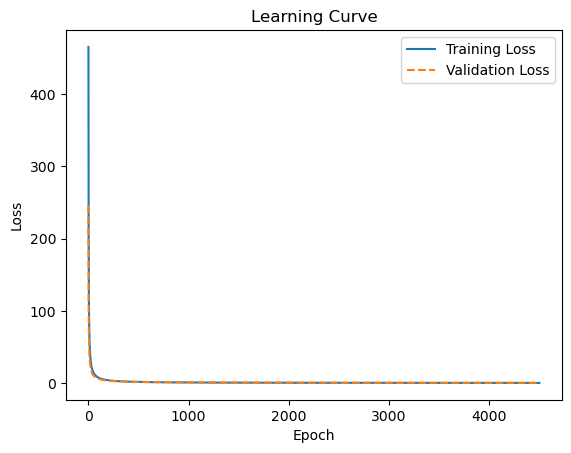

In [ ]:
# Training the model
nn.fit(
    x_train=x_train.values,
    y_train=y_train.values
)

# Print values
print(f"\n### Retraining for CUP ###")
nn.print_training_info()
nn.print_loss_plot()
#nn.print_regression_plot(x=x_train.values, y=y_train.values)

# Internal Testing Phase

In [ ]:

X = x_internal_test.values
y = y_internal_test.values

# Evaluate the Model on TS set
nn.test(
    x_test=X,
    y_test=y
)

# Prints the results obtained
print(nn)



 Trial:                    4
 Hyperparameters:          {'input_size': 10, 'hidden_size': 120, 'output_size': 3, 'hidden_layers': 2, 'input_activation': '', 'hidden_activation': 'Tanh', 'output_activation': '', 'tolerance': 0.02, 'learning_rate': 0.001, 'batch_size': 56, 'momentum': 0.8, 'weight_init': 'he_normal', 'epochs': 900, 'weight_decay': 0.0001, 'optimizer': 'SGD', 'nesterov': True, 'metrics': 'MEE', 'decimal_cypher_degree': 1}
 Mean Training Loss:       0.18866228384302458
 Mean Validation Loss:     0.25408379187193486
 Test Loss:                0.4118216559290886
 Mean Training MEE:        0.24227505380093342
 Mean Validation MEE:      0.42064490662239395
 Test MEE:                 0.6806261017918587
 f1 score:                 0
 f2 score:                 0
 Prediction score:         0
 Recall score:             0



# Predictions' Phase

In [ ]:
# Predictions
predictions = nn.predict(x_test=x_test.values)
print(predictions)

# Write predictions into file .CSV
data_handler.write_data(
    filename='team-name_ML-CUP23-TS.csv',
    id_list=df_id_test.values.tolist(),
    data=predictions,
    cols_name=['id', 'target_x', 'target_y', 'target_z']
)

predictions

[tensor(32.2311, grad_fn=<SelectBackward0>), tensor(33.1019, grad_fn=<SelectBackward0>), tensor(32.2498, grad_fn=<SelectBackward0>), tensor(-1.2940, grad_fn=<SelectBackward0>), tensor(41.0679, grad_fn=<SelectBackward0>), tensor(-5.2129, grad_fn=<SelectBackward0>), tensor(21.4077, grad_fn=<SelectBackward0>), tensor(24.8179, grad_fn=<SelectBackward0>), tensor(31.4705, grad_fn=<SelectBackward0>), tensor(32.4951, grad_fn=<SelectBackward0>), tensor(18.2061, grad_fn=<SelectBackward0>), tensor(34.2094, grad_fn=<SelectBackward0>), tensor(4.1171, grad_fn=<SelectBackward0>), tensor(33.0397, grad_fn=<SelectBackward0>), tensor(26.9573, grad_fn=<SelectBackward0>), tensor(27.7315, grad_fn=<SelectBackward0>), tensor(-9.5071, grad_fn=<SelectBackward0>), tensor(31.5406, grad_fn=<SelectBackward0>), tensor(35.2219, grad_fn=<SelectBackward0>), tensor(30.8771, grad_fn=<SelectBackward0>), tensor(31.7500, grad_fn=<SelectBackward0>), tensor(31.3305, grad_fn=<SelectBackward0>), tensor(-24.0003, grad_fn=<Select

TypeError: iteration over a 0-d tensor